# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


# Reading data

In [2]:
import os
data = pd.read_csv('/home/rajendra/data/mnist_train.csv')
data.head(10)

,2,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.712,0.713,0.714,0.715,0.716,0.717,0.718,0.719,0.720,0.721
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data.shape


(449, 785)

#data.plot(kind = 'line', x = 'Size', y = 'Price', figsize=(10,5))

In [5]:
cols = data.shape[1]
cols

785

In [6]:
x = np.array(data.iloc[:,1:cols])
y = np.array(data.iloc[:, 0:1])
x
#data.head()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [7]:
x.shape, y.shape

((449, 784), (449, 1))

# Creating array of unique element in array y

In [8]:
np.unique(y)

array([0, 1, 2, 3])

In [9]:
np.unique(y).shape

(4,)

In [10]:
classes = np.unique(y).shape[0]
classes

4

In [11]:
rows = data.shape[0]


# Inserting dummy variable(1 rows no. of times) in x, at 0th column(axis = 1), for easy calculation loop

In [12]:
x = np.insert(x,0,values = np.ones(rows), axis = 1)
x.shape

(449, 785)

In [13]:
x

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [14]:
parameters = x.shape[1]

# Initialising  theta matrix with zero

In [15]:
all_theta = np.zeros((4, parameters))

In [16]:
all_theta.shape

(4, 785)

# sigmoid Function

# \\(g(z) = sigmoid(z) = \frac{1}{1 + exp(-z)}\\)

In [17]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

# ComputeCost or Error Function defined

# \\(Cost=J(theta)=\frac{1}{2m} * \sum [first + second]   \\)

# \\(first + second = y*(-log(g(z))) + (1-y)*(-log(1-g(z)))\\)

### \\(where, z = x.theta^T = actual Output\\)

### first is error when expected output is 1 and second is error when expected output is 0

In [18]:
def computeCost(theta, x, y):
    theta = np.matrix(theta)
    x = np.matrix(x)
    y = np.matrix(y)
    
    first = np.multiply(-y, np.log(sigmoid(x*theta.T)))
    
    second = np.multiply(-(1-y), np.log(1-sigmoid(x*theta.T)))
    
    cost = np.sum(first + second)
    cost = cost/(2*len(x))
    
    return cost

In [19]:
cost = computeCost(all_theta, x,  y)
print("Cost = {}" .format(cost))

Cost = 1.38629436112


# Gradient Function defined

# \\(Grad = \frac{d(J)}{d(theta)} = \frac{c}{2m} * \sum [X^T.error]\\)

# \\(error = g(z) - y\\)

### \\(where, z = x*theta^T\\)

### \\(c = learning rate\\) and m = len(x) = no. of rows

In [20]:
learning_rate = 1
def gradient(theta, x, y):
    
    theta = np.matrix(theta)
    x = np.matrix(x)
    y = np.matrix(y)
    
    error = sigmoid(x*theta.T) - y
    
    grad = ((x.T*error)/(2*len(x)))
    
    grad = grad*learning_rate
    
    return grad

# Gradient Descent, i.e minimising theta

## Creating one hot matrix(y_i, which is a column array) for each classes using x,y
## and Calculating minimum theta i.e minimum value of computecost fuction using minimise Function(with initial theta as all 0's and args = (x,y_i), and jacobin = gradient)for each class 

In [21]:
from scipy.optimize import minimize
def one_vs_all(x, y, classes, temp_theta): #finding an one hot matrix of each class(y_i) and using it to find min theta for that class(i.e gradient descent)
    parameters = x.shape[1]
    rows = x.shape[0]
    
    for i in range(0, classes):#calculating the ith column of one hot matrix and passing it into gradient descent
        theta = np.zeros(parameters)
        theta = temp_theta[i,:] #ith row of theta
        
        y_i = np.array([1 if label == i else 0 for label in y])
        y_i = np.reshape(y_i, (rows, 1))
        
        #gradient descent
        fmin = minimize(fun =computeCost, x0 = theta, args = (x, y_i), method = 'TNC', jac = gradient)
        
        all_theta[i,:] = fmin.x
    return all_theta       
        

In [22]:
#classes = 4
min_theta = one_vs_all(x, y, classes, all_theta)
print(min_theta)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in multiply
  


[[-0.00526986  0.          0.         ...  0.          0.
   0.        ]
 [-0.0135359   0.          0.         ...  0.          0.
   0.        ]
 [-0.00288407  0.          0.         ...  0.          0.
   0.        ]
 [ 0.02512358  0.          0.         ...  0.          0.
   0.        ]]


In [23]:
computeCost(min_theta, x, y )

34.95410547491266

# Predicted y for input x 

In [24]:
def predict_all(x, theta):
    x = np.matrix(x)
    theta = np.matrix(theta)
    
    h = sigmoid(x*theta.T)
    h_argmax = np.argmax(h, axis = 1)
    return h_argmax

# Calculating Accuracy by comparing y_pred and y

In [25]:
y_pred = predict_all(x, min_theta)

In [26]:
correct = [1 if a == b else 0 for (a,b) in zip(y_pred,y)]
print(correct)
acc = (sum(map(int, correct))/float(len(correct)))
print("Training data ={}%" .format(acc*100))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

# Testing->input png>rgb2gray>grarray>bw>ravel>reshape>insert dummy variable>predict fun called

## Input testing image

In [27]:
import matplotlib.image as mpimg
img = mpimg.imread('/home/rajendra/data/test1.png')

## rgb2gray function defined, called and plotted

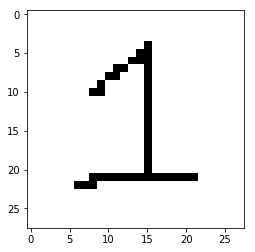

In [28]:
def rgb2gray(rgb):
    return np.dot(rgb[:,:,:3], [0.299, 0.587, 0.114])

gray = rgb2gray(img)
plt.imshow(gray, cmap = plt.get_cmap('gray'))

## converted to grarray and then inverted it(bw)

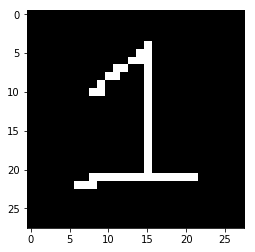

In [29]:
grarray = np.asarray(gray)
bw = (grarray < (grarray.mean()))*255
plt.imshow(np.reshape(bw,(28,28)),cmap = plt.cm.gray)
#bw

## ravel and reshaped and inserted dummy variable

In [30]:
bw= bw.ravel()
bw = bw.reshape(1,-1)
brows = bw.shape[0]
bw= np.insert(bw,0,values=np.ones(brows), axis = 1)
#bw.shape
#bw

## predict called

In [31]:
pred = predict_all(bw, min_theta)
print(pred)

[[3]]
